In [357]:
import math
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import  pandas as pd

In [358]:
Train_Data = pd.read_csv('C:\\Users\\sepeh\\PycharmProjects\\MachinLearning\\.venv\\Kaggel\\house_prices\\train.csv')
Test_Data = pd.read_csv('C:\\Users\\sepeh\\PycharmProjects\\MachinLearning\\.venv\\Kaggel\\house_prices\\test.csv')
Answer = pd.read_csv('C:\\Users\\sepeh\\PycharmProjects\\MachinLearning\\.venv\\Kaggel\\house_prices\\sample_submission.csv')

In [359]:
Train_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [360]:
Test_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [361]:
Answer.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [362]:
print((Train_Data['EnclosedPorch'].isnull().sum()))
print((Train_Data['LotFrontage'].isnull().sum()))

0
259


In [363]:
print("تعداد سطرها قبل از حذف کامل:", len(Train_Data))


Train_Data_drop = Train_Data.dropna(subset= ['LotFrontage'])
# print("تعداد سطرها بعد از حذف سطرهای کاملاً خالی:", len(Train_Data_drop))
Train_Data_drop =  Train_Data_drop.drop(columns=['LandSlope', 'PoolQC', 'MiscVal'], inplace=False)
# Train_Data_drop = Train_Data.dropna(how='any')
print(Train_Data_drop.columns)

print(len(Train_Data_drop))


تعداد سطرها قبل از حذف کامل: 1460
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond

In [364]:
print("تعداد سطرها قبل از حذف کامل:", len(Test_Data))


Test_Data_drop = Test_Data.dropna(subset= ['LotFrontage'])
# print("تعداد سطرها بعد از حذف سطرهای کاملاً خالی:", len(Train_Data_drop))
Test_Data_drop =  Test_Data_drop.drop(columns=['LandSlope', 'PoolQC', 'MiscVal'], inplace=False)
# Train_Data_drop = Train_Data.dropna(how='any')
print(Test_Data_drop.columns)

print(len(Train_Data_drop))


تعداد سطرها قبل از حذف کامل: 1459
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond

new

In [365]:
Train_Data_drop['age'] =  Train_Data_drop['YearRemodAdd'] -  Train_Data_drop['YearBuilt']
numeric_features = ['LotArea', 'OverallQual', 'age','TotRmsAbvGrd','Fireplaces', 'GarageCars', 'GarageArea', 'age']
categorical_features = ['Neighborhood','MSZoning', 'Exterior1st','Foundation',  'HeatingQC','Electrical','KitchenQual', 'Fence', 'SaleCondition']


In [366]:
Test_Data_drop['age'] =  Test_Data_drop['YearRemodAdd'] -  Test_Data_drop['YearBuilt']
numeric_features_test = ['LotArea', 'OverallQual', 'age','TotRmsAbvGrd','Fireplaces', 'GarageCars', 'GarageArea', 'age']
categorical_features_test = ['Neighborhood','MSZoning', 'Exterior1st','Foundation',  'HeatingQC','Electrical','KitchenQual', 'Fence', 'SaleCondition']

In [367]:
imput = SimpleImputer(missing_values=np.nan, strategy='mean')

Train_Data_drop[numeric_features] =\
 imput.fit_transform(Train_Data_drop[numeric_features])

imput2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

Train_Data_drop[categorical_features]  = imput2.fit_transform(Train_Data_drop[categorical_features])





imput_test = SimpleImputer(missing_values=np.nan, strategy='mean')

Test_Data_drop[numeric_features] =\
 imput_test.fit_transform(Test_Data_drop[numeric_features])

imput2_test = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

Test_Data_drop[categorical_features]  = imput2_test.fit_transform(Test_Data_drop[categorical_features])








In [369]:
# رمزگذاری One-Hot
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output= False)
Train_encoded = encoder.fit_transform(Train_Data_drop[categorical_features])
Test_encoded = encoder.transform(Test_Data_drop[categorical_features])


Train_Data_encoded = pd.DataFrame(Train_encoded, columns=encoder.get_feature_names_out(categorical_features))
Test_Data_encoded = pd.DataFrame(Test_encoded, columns=encoder.get_feature_names_out(categorical_features))

# افزودن ویژگی‌های رمزگذاری شده به داده‌ها
Train_Data_drop = Train_Data_drop.join(Train_Data_encoded).drop(columns=categorical_features)
Test_Data_drop = Test_Data_drop.join(Test_Data_encoded).drop(columns=categorical_features)




ستون‌های موجود در Train_Data_drop:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities',
       ...
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'HeatingQC_Ex', 'HeatingQC_Fa',
       'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA'],
      dtype='object', length=112)
ستون‌های موجود در Test_Data_drop:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities',
       ...
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'HeatingQC_Ex', 'HeatingQC_Fa',
       'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA'],
      dtype='object', length=111)


Train Data length before processing: 1460
Train Data length after dropping rows: 1201


In [371]:
X = pd.concat([Train_Data_drop[numeric_features], Train_Data_encoded], axis=1)
y = Train_Data_drop['SalePrice']

In [372]:
print(len(X))
print(len(y))

Length of X: 1201
Length of y: 1201
   LotArea  OverallQual  GarageCars   age  Neighborhood_Blmngtn  \
0   8450.0          7.0         2.0   0.0                   0.0   
1   9600.0          6.0         2.0   0.0                   0.0   
2  11250.0          7.0         2.0   1.0                   0.0   
3   9550.0          7.0         3.0  55.0                   0.0   
4  14260.0          8.0         3.0   0.0                   0.0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   
3                   0.0                  0.0                   0.0   
4                   0.0                  0.0                   0.0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  ...  Foundation_CBlock  \
0                   0.0                   1.0  ...                0

In [373]:
model = RandomForestRegressor(max_features=0.5, n_estimators=300, min_samples_leaf=1 )
model.fit(X,y )
# model = MLPRegressor(hidden_layer_sizes=(64, 64,64),activation='relu', max_iter=3000, shuffle=False)
# model.fit(X, y)

RandomForestRegressor(max_features=0.5, n_estimators=300)

In [383]:
# Fence_lable2 = LabelEncoder()
# BldgType_lable2 = LabelEncoder()
# SaleType_lable2 = LabelEncoder()
# HeatingQC_lable2 = LabelEncoder()
# KitchenQual_lable2 = LabelEncoder()
# Sale_con_lable2 = LabelEncoder()
# 
# Test_Data_drop['Fence_encoded'] = Fence_lable2.fit_transform(Test_Data_drop['Fence'])
# 
# Test_Data_drop['BldgType_encoded'] = BldgType_lable2.fit_transform(Test_Data_drop['BldgType'])
# 
# Test_Data_drop['SaleType_encoded'] = SaleType_lable2.fit_transform(Test_Data_drop['SaleType'])
# 
# Test_Data_drop['HeatingQC_encoded'] = HeatingQC_lable2.fit_transform(Test_Data_drop['HeatingQC'])
# 
# Test_Data_drop['Kitch'] = KitchenQual_lable2.fit_transform(Test_Data_drop['KitchenQual'])
#  
# Test_Data_drop['SaleCondition'] = Sale_con_lable2.fit_transform(Test_Data_drop['SaleCondition'])
#  


In [374]:

model.score(X,y)


0.971619508354617

In [375]:

kept_ids = Test_Data_drop['Id'].tolist()

# فیلتر کردن Answer برای شامل شدن فقط سطرهایی که شناسه‌هایشان در Test_Data_drop هستند
Answer_filtered = Answer[Answer['Id'].isin(kept_ids)].reset_index(drop=True)


In [376]:
pred_train = model.predict(X)

mse_train = mean_squared_error(y, pred_train)
print(mse_train)
rmse = math.sqrt(mse_train)
print(rmse)

197188280.46660766
14042.374459706152


In [377]:
X2 = Test_Data_drop[['Id','MSSubClass','YearBuilt', 'Fence_encoded','BldgType_encoded','SaleType_encoded',  'HeatingQC_encoded', 'Kitch', 'SaleCondition', 'TotRmsAbvGrd']]
y2 = Answer_filtered['SalePrice']

In [378]:
# print(len(pred))
print(len(X2))
print(len(Answer_filtered))

1232
   LotArea  OverallQual  GarageCars  age  Neighborhood_Blmngtn  \
0  11622.0          5.0         1.0  0.0                   0.0   
1  14267.0          6.0         1.0  0.0                   0.0   
2  13830.0          5.0         2.0  1.0                   0.0   
3   9978.0          6.0         2.0  0.0                   0.0   
4   5005.0          8.0         2.0  0.0                   0.0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   
3                   0.0                  0.0                   0.0   
4                   0.0                  0.0                   0.0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  ...  Foundation_CBlock  \
0                   0.0                   0.0  ...                1.0   
1                   0.0        

In [379]:
pred = model.predict(X2)

In [386]:
mse = mean_squared_error(y2, pred)
print(mse)
rmse = math.sqrt(mse)
print(rmse)


5535103384.623574
74398.27541431034


رتبه بندی ویژگی‌ها:
1. ویژگی OverallQual - اهمیت: 0.46542007884043707
2. ویژگی GarageCars - اهمیت: 0.18462931610980965
3. ویژگی LotArea - اهمیت: 0.1542047699414099
4. ویژگی Foundation_PConc - اهمیت: 0.04799239916466642
5. ویژگی age - اهمیت: 0.02310952792982017
6. ویژگی HeatingQC_Ex - اهمیت: 0.021609401314718592
7. ویژگی Neighborhood_NoRidge - اهمیت: 0.019319190869490056
8. ویژگی Neighborhood_NridgHt - اهمیت: 0.009438190850256637
9. ویژگی Neighborhood_Edwards - اهمیت: 0.007658950716941904
10. ویژگی Neighborhood_Crawfor - اهمیت: 0.007263874122743125
11. ویژگی Neighborhood_StoneBr - اهمیت: 0.006213189250584683
12. ویژگی Foundation_CBlock - اهمیت: 0.004943575288414002
13. ویژگی Neighborhood_Somerst - اهمیت: 0.004753377242268639
14. ویژگی Neighborhood_OldTown - اهمیت: 0.004126685024814565
15. ویژگی HeatingQC_TA - اهمیت: 0.004047976462548931
16. ویژگی Neighborhood_CollgCr - اهمیت: 0.0035968512577588107
17. ویژگی Neighborhood_Timber - اهمیت: 0.00340568133946756
18. ویژگی Foundation_BrkTil - ا

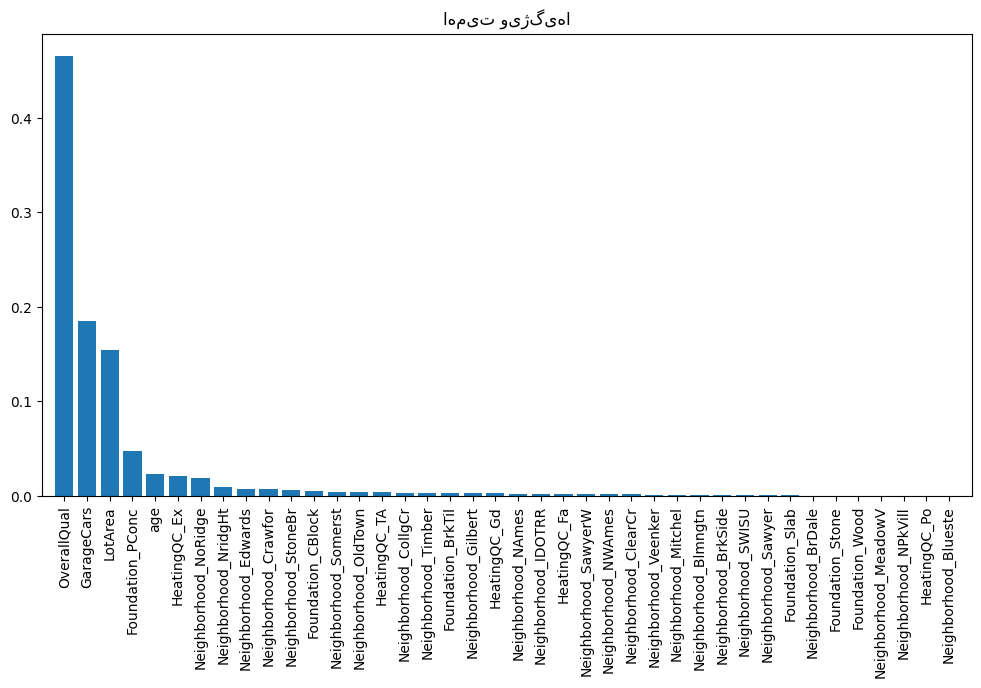

In [381]:
importances = model.feature_importances_

# ترتیب دهی ویژگی‌ها بر اساس اهمیت
indices = np.argsort(importances)[::-1]

# نمایش نتایج
print("رتبه بندی ویژگی‌ها:")
for f in range(X.shape[1]):
    print(f"{f + 1}. ویژگی {X.columns[indices[f]]} - اهمیت: {importances[indices[f]]}")

# رسم نمودار اهمیت ویژگی‌ها
plt.figure(figsize=(12, 6))
plt.title("اهمیت ویژگی‌ها")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [382]:
# # street_lable = LabelEncoder()
# BldgType_lable = LabelEncoder()
# SaleType_lable = LabelEncoder()
# HeatingQC_lable = LabelEncoder()
# KitchenQual_lable = LabelEncoder()
# Sale_con_lable = LabelEncoder()
# Fence_lable = LabelEncoder()
# 
# # Train_Data_drop['street_encoded'] = street_lable.fit_transform(Train_Data_drop['Street'])
# 
# Train_Data_drop['BldgType_encoded'] = BldgType_lable.fit_transform(Train_Data_drop['BldgType'])
# 
# Train_Data_drop['SaleType_encoded'] = SaleType_lable.fit_transform(Train_Data_drop['SaleType'])
# 
# Train_Data_drop['HeatingQC_encoded'] = HeatingQC_lable.fit_transform(Train_Data_drop['HeatingQC'])
# 
# Train_Data_drop['Kitch'] = KitchenQual_lable.fit_transform(Train_Data_drop['KitchenQual'])
#  
# Train_Data_drop['SaleCondition'] = Sale_con_lable.fit_transform(Train_Data_drop['SaleCondition'])
#  
# Train_Data_drop['Fence_encoded'] = Fence_lable.fit_transform(Train_Data_drop['Fence'])

Validation RMSE: 0.2004374888019223


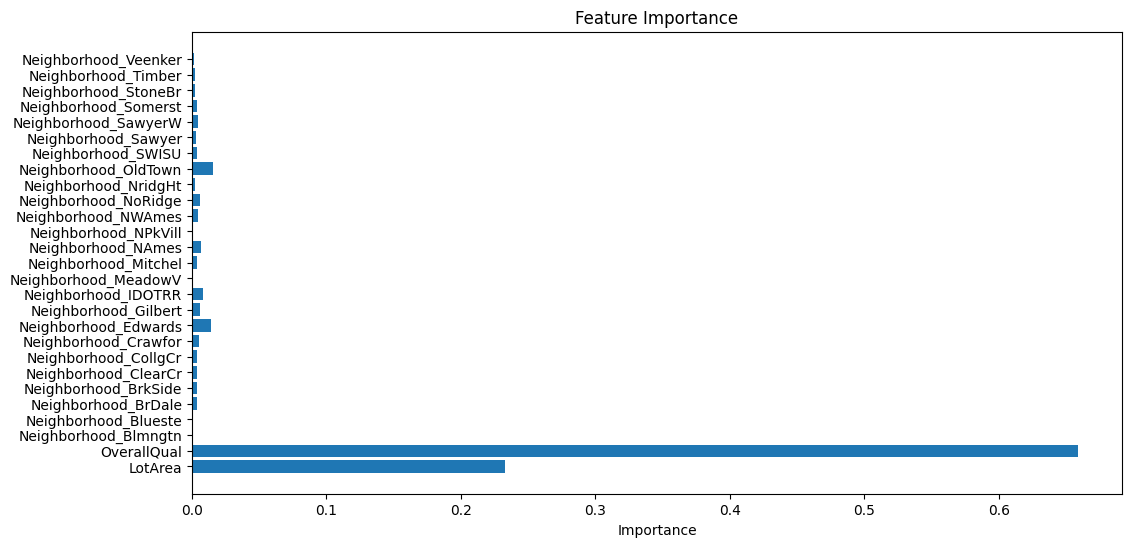

In [388]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# بارگذاری داده‌ها
Train_Data = pd.read_csv('C:\\Users\\sepeh\\PycharmProjects\\MachinLearning\\.venv\\Kaggel\\house_prices\\train.csv')
Test_Data = pd.read_csv('C:\\Users\\sepeh\\PycharmProjects\\MachinLearning\\.venv\\Kaggel\\house_prices\\test.csv')
Answer = pd.read_csv('C:\\Users\\sepeh\\PycharmProjects\\MachinLearning\\.venv\\Kaggel\\house_prices\\sample_submission.csv')

# تبدیل متغیر هدف با log
Train_Data['SalePrice'] = np.log1p(Train_Data['SalePrice'])

# انتخاب ویژگی‌های ورودی و هدف
y = Train_Data['SalePrice']
X = Train_Data[['LotArea', 'OverallQual', 'Neighborhood']]

# شناسایی ویژگی‌های عددی و دسته‌ای
numeric_features = ['LotArea', 'OverallQual']
categorical_features = ['Neighborhood']

# ساخت ColumnTransformer برای پیش‌پردازش
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# ساخت مدل Random Forest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

# تقسیم داده‌ها به مجموعه آموزشی و آزمایشی
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی روی داده‌های اعتبارسنجی
val_pred = model.predict(X_val)

# ارزیابی مدل
val_rmse = math.sqrt(mean_squared_error(y_val, val_pred))
print("Validation RMSE:", val_rmse)

# پیش‌بینی روی داده‌های تست
X_test = Test_Data[['LotArea', 'OverallQual', 'Neighborhood']]
test_pred = model.predict(X_test)

# تبدیل پیش‌بینی‌ها به مقیاس اصلی با معکوس `log`
test_pred_exp = np.expm1(test_pred)

# نمایش ویژگی‌های مهم
# به دست آوردن نام ویژگی‌های اصلی پس از OneHotEncoding
feature_names = (numeric_features + 
                 list(model.named_steps['preprocessor'].named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)))

# استخراج اهمیت ویژگی‌ها
feature_importances = model.named_steps['regressor'].feature_importances_

# ایجاد DataFrame برای ویژگی‌ها و اهمیت آن‌ها
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# ترسیم اهمیت ویژگی‌ها
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.show()

# ذخیره نتیجه
Answer['SalePrice'] = test_pred_exp
Answer.to_csv('submission.csv', index=False)
